## 2024: Week 4 - Unpopular Seats

Last week you needed to use a Join technique to pair the flight data with the sales targets. This week you'll be using Joins again but this time in a different way. 

When using Joins, there are two things you need to set up:

- Join Condition - what logic will join similar rows of data together from each data set
- Join Type - determines what data you will bring back based on the Join Condition
  
This challenge will test using join types to return the data you require for the output.

This week we are trying to understand which seats aren't chosen on our planes as we're thinking of applying fees for customers to choose their seat when booking. 
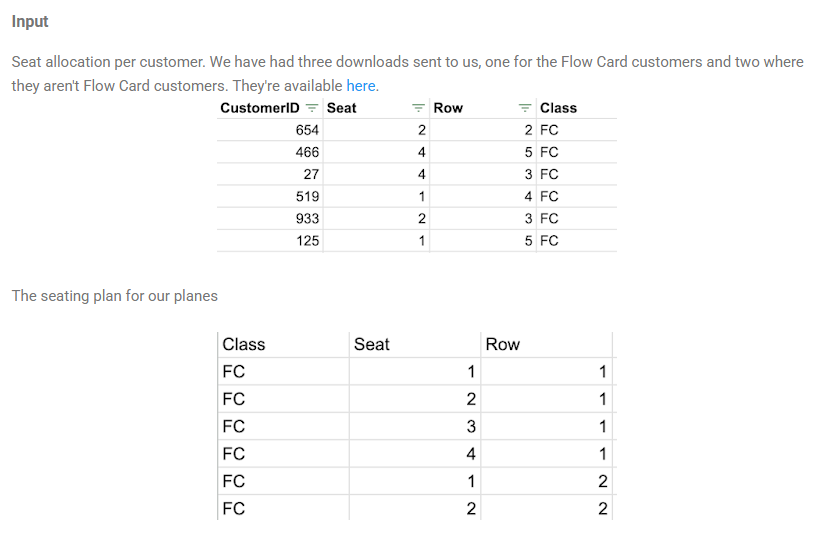

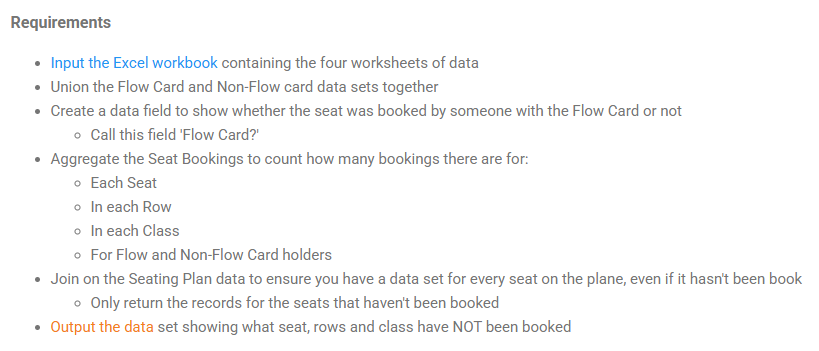

In [28]:
import pandas as pd
import numpy

In [8]:
# use sheet_name = None to get all existing sheets
df = pd.read_excel('PD 2024 Wk 4 Input.xlsx', sheet_name=None)

In [14]:
df['Flow Card'].head()

,CustomerID,Seat,Row,Class
0,654,2,2,FC
1,466,4,5,FC
2,27,4,3,FC
3,519,1,4,FC
4,933,2,3,FC


#### Union the Flow Card and Non-Flow card data sets together
#### Create a data field to show whether the seat was booked by someone with the Flow Card or not
- Call this field 'Flow Card?'

In [34]:
# take a look at the sheets names
df.keys()

dict_keys(['Flow Card', 'Non_flow Card', 'Non_flow Card2', 'Seat Plan'])

In [36]:
# First, we are going to create 'Flow Card' column
df['Flow Card']['Flow Card'] = 1
df['Non_flow Card']['Flow Card'] = 0
df['Non_flow Card2']['Flow Card'] = 0

In [40]:
df_card = pd.concat((df['Flow Card'], df['Non_flow Card'], df['Non_flow Card2']), axis=0)
df_card.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29213 entries, 0 to 9739
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  29213 non-null  int64 
 1   Seat        29213 non-null  int64 
 2   Row         29213 non-null  int64 
 3   Class       29213 non-null  object
 4   Flow Card   29213 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ MB


In [42]:
df_card.head()

,CustomerID,Seat,Row,Class,Flow Card
0,654,2,2,FC,1
1,466,4,5,FC,1
2,27,4,3,FC,1
3,519,1,4,FC,1
4,933,2,3,FC,1


#### Aggregate the Seat Bookings to count how many bookings there are for:
- Each Seat
- In each Row
- In each Class
- For Flow and Non-Flow Card holders

In [52]:
bookings_count = df_card.groupby(['Seat', 'Row', 'Class', 'Flow Card']).count().reset_index()

#### Join on the Seating Plan data to ensure you have a data set for every seat on the plane, even if it hasn't been book
- Only return the records for the seats that haven't been booked

In [100]:
unbooked_seats = pd.merge(left=df_card, right=df['Seat Plan'], on=['Seat', 'Row', 'Class'], how='outer', indicator=True)\
  .query('_merge=="right_only"')
unbooked_seats = unbooked_seats.drop(['CustomerID', 'Flow Card', '_merge'], axis=1)

In [102]:
unbooked_seats

,Seat,Row,Class
17197,5,28,E
17954,5,36,E
18276,5,40,E
18277,5,41,E
19810,6,32,E
20247,6,37,E
20457,6,40,E
